#### Import Libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#### Read dataset.

In [39]:
data = pd.read_csv("train.csv")

In [40]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
# shuffle the dataset.

data_s = data.sample(frac=1).reset_index(drop=True)
data_s

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,410,60,FV,85.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,339750
1,185,50,RL,92.0,7438,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,127000
2,1092,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,160000
3,358,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,134000
4,1249,75,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
1456,1393,85,RL,68.0,7838,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,12,2006,WD,Normal,123000
1457,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
1458,214,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,156000


In [44]:
data_s.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [45]:
data_s.shape

(1460, 81)

In [46]:
print(data['Alley'].isna().sum())
print(data['FireplaceQu'].isna().sum())
print(data['PoolQC'].isna().sum())
print(data['Fence'].isna().sum())
print(data['MiscFeature'].isna().sum())

1369
690
1453
1179
1406


In [10]:
# choose the drop the columns with excess NaN values or impute them:

# data_s.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace=True)

# data_s.drop(['LotFrontage'], axis=1, inplace=True)

In [47]:
data_s.shape

(1460, 81)

In [48]:
# Dropping Id, since it isn’t of any significance:

data_s.drop(['Id'], axis=1, inplace=True)
data_s.shape

(1460, 80)

In [49]:
data_s

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,FV,85.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,339750
1,50,RL,92.0,7438,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,127000
2,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,160000
3,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,134000
4,75,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
1456,85,RL,68.0,7838,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnWw,NaN,0,12,2006,WD,Normal,123000
1457,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
1458,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,156000


In [50]:
# Imputing Missing Values
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Columns of dtype object are imputed with the most frequent value in column. 
        Columns of other types are imputed with mean of column."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in 
            X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [51]:
X = pd.DataFrame(data_s)
data_s = DataFrameImputer().fit_transform(X)

data_s.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [52]:
data_s

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,FV,85.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2008,New,Partial,339750
1,50,RL,92.0,7438,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,6,2006,WD,Normal,127000
2,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,3,2008,WD,Normal,160000
3,120,RM,44.0,4224,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,134000
4,75,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,50,RL,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,6,2007,WD,Normal,175000
1456,85,RL,68.0,7838,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnWw,Shed,0,12,2006,WD,Normal,123000
1457,90,RL,91.0,11643,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2009,WD,Normal,200000
1458,20,RL,43.0,13568,Pave,Grvl,IR2,Lvl,AllPub,CulDSac,...,0,Gd,MnPrv,Shed,0,7,2006,WD,Normal,156000


In [53]:
CateList = data_s.select_dtypes(include="object").columns
print(CateList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [54]:
data_s.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,FV,85.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2008,New,Partial,339750
1,50,RL,92.0,7438,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,6,2006,WD,Normal,127000
2,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,3,2008,WD,Normal,160000
3,120,RM,44.0,4224,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,134000
4,75,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Normal,129500


In [55]:
LE = LabelEncoder()
for i in CateList:
    data_s[i] = LE.fit_transform(data_s[i])
data_s.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1,85.0,10800,1,0,3,3,0,4,...,0,2,2,2,0,4,2008,6,5,339750
1,50,3,92.0,7438,1,0,0,3,0,4,...,0,2,2,2,0,6,2006,8,4,127000
2,160,1,24.0,2160,1,1,3,3,0,4,...,0,2,2,2,0,3,2008,8,4,160000
3,120,4,44.0,4224,1,0,3,3,0,4,...,0,2,2,2,0,8,2007,8,4,134000
4,75,4,60.0,9600,1,0,3,3,0,4,...,0,2,2,2,0,4,2008,8,4,129500


In [56]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [57]:
# from sklearn.preprocessing import StandardScaler
df = data_s.iloc[:,:-1]
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,1,85.0,10800,1,0,3,3,0,4,...,0,0,2,2,2,0,4,2008,6,5
1,50,3,92.0,7438,1,0,0,3,0,4,...,0,0,2,2,2,0,6,2006,8,4
2,160,1,24.0,2160,1,1,3,3,0,4,...,0,0,2,2,2,0,3,2008,8,4
3,120,4,44.0,4224,1,0,3,3,0,4,...,0,0,2,2,2,0,8,2007,8,4
4,75,4,60.0,9600,1,0,3,3,0,4,...,0,0,2,2,2,0,4,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,50,3,60.0,7200,1,0,3,3,0,0,...,0,0,2,2,2,0,6,2007,8,4
1456,85,3,68.0,7838,1,0,3,3,0,4,...,0,0,2,3,2,0,12,2006,8,4
1457,90,3,91.0,11643,1,0,3,3,0,4,...,0,0,2,2,2,0,8,2009,8,4
1458,20,3,43.0,13568,1,0,1,3,0,1,...,0,0,2,2,2,0,7,2006,8,4


In [58]:
mm = MinMaxScaler()
df[:]= mm.fit_transform(df[:])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.25,0.219178,0.044404,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.272727,0.50,0.75,1.0
1,0.176471,0.75,0.243151,0.028690,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.454545,0.00,1.00,0.8
2,0.823529,0.25,0.010274,0.004020,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.181818,0.50,1.00,0.8
3,0.588235,1.00,0.078767,0.013667,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.636364,0.25,1.00,0.8
4,0.323529,1.00,0.133562,0.038795,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.272727,0.50,1.00,0.8


In [61]:
df.head(-5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.25,0.219178,0.044404,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.272727,0.50,0.75,1.0
1,0.176471,0.75,0.243151,0.028690,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.454545,0.00,1.00,0.8
2,0.823529,0.25,0.010274,0.004020,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.181818,0.50,1.00,0.8
3,0.588235,1.00,0.078767,0.013667,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.636364,0.25,1.00,0.8
4,0.323529,1.00,0.133562,0.038795,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.272727,0.50,1.00,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0.235294,0.75,0.178082,0.036299,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.000000,0.666667,0.0,1.000000,0.50,1.00,0.8
1451,0.000000,0.75,0.195205,0.030382,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.181818,1.00,1.00,0.8
1452,0.352941,0.75,0.219178,0.041599,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.636364,0.50,1.00,0.0
1453,0.058824,1.00,0.133562,0.026226,1.0,0.0,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,0.666667,0.666667,0.0,0.818182,0.75,1.00,0.8


In [64]:
X = df.values
y = data['SalePrice'].values

X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}') 
print(f'y: Type-{y_type}, Shape-{y_shape}')


X: Type-<class 'numpy.ndarray'>, Shape-(1460, 79)
y: Type-<class 'numpy.ndarray'>, Shape-(1460,)


In [65]:

# Splitting our data into Training and Testing data:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)


print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)



(1095, 79) (365, 79)
(1095,) (365,)


In [90]:
y_train.shape[0]

1095

In [82]:

# Writing our predict function that returns our hypothesis:

def predict(X,weights):
    y_pred = np.dot(X,weights)
    assert (y_pred.shape==(X.shape[0],1))
    print (y_pred)
    return y_pred

In [66]:

# Defining mean_squared_error function that returns loss\cost function value at that given training example:

# Loss Function: When you’re only considering a single training example.
# Cost Function: When you’re considering the entire batch/mini-batch.

def mean_squared_error(y_actual, y_pred): 
    loss = (1/(2*y_actual.shape[0])*np.sum(y_actual-y_pred)**2)
    return loss

In [67]:

# Defining our gradient (the gradient matrix is initialized to 0):

def gradient(X, y_actual, y_pred):
    grad = np.zeros((len(X[1]),1))
    diff = y_pred-y_actual
    for i in range(len(X[1])):
      grad[i][0] = (2/X.shape[0])*np.sum(np.dot(X[:,i],(diff)))
    return grad

In [68]:

# Defining our gradient descent function (initializing our weights to random numbers — can also be initialized to 0):

def gradient_descent(X, y, learning_rate=0.01, max_iterations=100):

    weights = np.random.rand(len(X[1]),1)
    losses  = []
  
    y_true = y.reshape(-1,1)
    for i in range(max_iterations):
        y_pred = predict(X,weights)
        losses.append(mean_squared_error(y_true,y_pred))
        grad = gradient(X,y_true,y_pred)

        for i in range(len(X[1])):
          weights[i][0] = weights[i][0] - learning_rate*grad[i][0]
    
    return weights, losses

In [73]:
optimal_weights, losses = gradient_descent(X_train, y_train, 0.001, 200)

In [74]:
print("Root mean-squared error:", losses[-1]**(1/2))

Root mean-squared error: 13939.579600664685


#### Checking if your gradient descent is actually working (if the losses are decreasing):

In [75]:
for i in range(len(losses)):
  print(losses[i]**(1/2))

4216023.942642697
4008964.8863563254
3812109.185710662
3624954.0387409306
3447021.4206113946
3277856.8626453257
3117028.2915220847
2964124.9256763593
2818756.2260807627
2680550.898731878
2549155.946291908
2424235.766463623
2305471.294795687
2192559.1897289143
2085211.0578019074
1983152.7170370885
1886123.4966256784
1793875.5711228708
1706173.3274526112
1622792.7631051794
1543520.913990456
1468155.3104855001
1396503.4602870692
1328382.3567481907
1263618.011442974
1202045.009765747
1143506.0884294233
1087851.7337839513
1034939.7999288694
984635.1456445525
936809.2892147996
891340.0802591082
848111.3877364368
807012.8033235491
767939.3594103124
730791.2609916553
695473.6307713784
661896.2668267735
629973.4122150636
599623.5359332068
570769.1246715868
543336.484829683
517255.554288038
492459.7234557435
468885.6651363698
446473.1727777774
425165.00669267395
404906.7478571305
385646.6589136294
367335.5520236206
349926.6632320507
333375.53302297427
317639.8927611563
302679.55672961596
288456.

In [76]:

# Seeing our predictions on our training data:

train_pred = predict(X_train, optimal_weights)
train_pred

array([[168184.4915897 ],
       [167986.17807111],
       [186166.24242669],
       ...,
       [180086.18297484],
       [186172.39641372],
       [182882.02914304]])

In [77]:

#actual values

y_train

array([157900, 118000, 173000, ..., 262500, 133000, 131000], dtype=int64)

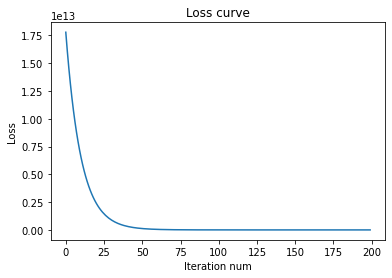

In [78]:

# Plotting our loss curve:

import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

#### You can compare the same problem using Sklearn’s inbuilt function:

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_train)
r2_score(y_train, pred)

0.07067256653926401

In [81]:
pred2 = model.predict(X_test)
r2_score(y_test, pred2)

-0.08964824322926956